#import library and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.1 MB/s e

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pycaret.utils import version
version()

'3.1.0'

In [ ]:
file_data = open("/content/drive/MyDrive/Colab Notebooks/DESN9002/data4.csv")
data = pd.read_csv(file_data).drop(columns = ['Unnamed: 0'])
file_data.close()
data

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness
0,2020-03-02,0,0.030802,0.001614,0.008962,0.003198,0.942573,0.012850,0.000000,0.396788,0.348703,2,0.500000,0.000000,0.500000
1,2020-03-03,0,0.464835,0.006583,0.210445,0.004030,0.156166,0.157942,1.000000,0.563771,0.199048,1,0.000000,1.000000,0.000000
2,2020-03-04,0,0.040440,0.002685,0.039322,0.002545,0.883447,0.031562,0.000000,0.443000,0.232520,1,0.000000,0.000000,1.000000
3,2020-03-06,0,0.299911,0.005154,0.188610,0.005715,0.158333,0.342277,0.000000,0.368819,0.523337,1,0.000000,0.000000,1.000000
4,2020-03-09,0,0.005408,0.000737,0.006073,0.001063,0.903466,0.083254,0.000000,0.399632,0.307440,1,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-04-23,2263,0.502118,0.004432,0.149121,0.002255,0.162227,0.179848,0.186747,0.526251,0.352366,332,0.138686,0.447080,0.414234
358,2021-04-24,2624,0.511105,0.030395,0.148192,0.006515,0.145168,0.158625,0.232558,0.539379,0.350642,301,0.093496,0.455285,0.451220
359,2021-04-25,2767,0.486890,0.008735,0.120434,0.003144,0.204670,0.176128,0.211735,0.526570,0.342870,392,0.031915,0.592199,0.375887
360,2021-04-26,2812,0.552460,0.012874,0.112837,0.006918,0.143397,0.171513,0.204433,0.552854,0.348600,406,0.020168,0.638655,0.341176


In [ ]:
data_binary = data
data_binary['crisis'] = data_binary['New_deaths'].map(lambda x: 1 if x > 1000 else 0)
data_binary

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness,crisis
0,2020-03-02,0,0.030802,0.001614,0.008962,0.003198,0.942573,0.012850,0.000000,0.396788,0.348703,2,0.500000,0.000000,0.500000,0
1,2020-03-03,0,0.464835,0.006583,0.210445,0.004030,0.156166,0.157942,1.000000,0.563771,0.199048,1,0.000000,1.000000,0.000000,0
2,2020-03-04,0,0.040440,0.002685,0.039322,0.002545,0.883447,0.031562,0.000000,0.443000,0.232520,1,0.000000,0.000000,1.000000,0
3,2020-03-06,0,0.299911,0.005154,0.188610,0.005715,0.158333,0.342277,0.000000,0.368819,0.523337,1,0.000000,0.000000,1.000000,0
4,2020-03-09,0,0.005408,0.000737,0.006073,0.001063,0.903466,0.083254,0.000000,0.399632,0.307440,1,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-04-23,2263,0.502118,0.004432,0.149121,0.002255,0.162227,0.179848,0.186747,0.526251,0.352366,332,0.138686,0.447080,0.414234,1
358,2021-04-24,2624,0.511105,0.030395,0.148192,0.006515,0.145168,0.158625,0.232558,0.539379,0.350642,301,0.093496,0.455285,0.451220,1
359,2021-04-25,2767,0.486890,0.008735,0.120434,0.003144,0.204670,0.176128,0.211735,0.526570,0.342870,392,0.031915,0.592199,0.375887,1
360,2021-04-26,2812,0.552460,0.012874,0.112837,0.006918,0.143397,0.171513,0.204433,0.552854,0.348600,406,0.020168,0.638655,0.341176,1


In [ ]:
data_binary.groupby('crisis').describe()

New_deaths                                                           \
            count         mean         std     min     25%     50%     75%   
crisis                                                                       
0           315.0   342.073016  283.719356     0.0   101.0   274.0   518.0   
1            47.0  1370.787234  521.415671  1007.0  1064.0  1133.0  1315.5   

                  joy            ... illness_no illness       \
           max  count      mean  ...                75%  max   
crisis                           ...                           
0        986.0  315.0  0.578895  ...               1.00  1.0   
1       2812.0   47.0  0.554636  ...               0.75  1.0   

       illness_severe illness                                               \
                        count      mean       std  min       25%       50%   
crisis                                                                       
0                       315.0  0.227963  0.250347  0.0  0.000000  0.166667   
1                        47.0  0.363404  0.279172  0.0  0.083333  0.375887   

                       
             75%  max  
crisis                 
0       0.379808  1.0  
1       0.500000  1.0  

[2 rows x 112 columns]

#calssification

##experiment(classification)

In [ ]:
data.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (356, 16)


In [ ]:
data.nunique()

Date                      356
New_deaths                291
joy                       356
love                      356
sadness                   356
surprise                  356
fear                      356
anger                     356
disease-related           356
sentiment_label           356
Average rating            356
NumberOfPost               51
illness_light illness      76
illness_no illness        356
illness_severe illness    356
crisis                      2
dtype: int64

In [ ]:
numericals   = ['joy', 'love', 'sadness', 'surprise','fear','anger','disease-related','sentiment_label','Average rating', 'NumberOfPost', 'illness_light illness', 'illness_no illness', "illness_severe illness"]
ignore       = ['Date', 'New_deaths']

In [ ]:
from pycaret.classification import *

In [ ]:
#experimentA = no preprocessing
expA = ClassificationExperiment()
expA.setup(data, ignore_features=ignore,  target='crisis', session_id=123, train_size=0.8, preprocess=False, numeric_features=numericals, fold = 5)

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(356, 16)"
4,Transformed data shape,"(356, 14)"
5,Transformed train set shape,"(284, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,2
8,Numeric features,13


In [ ]:
top3_expA = expA.compare_models(n_select=3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9541,0.9638,0.7821,0.8500,0.8105,0.7847,0.7881,0.0360
et,Extra Trees Classifier,0.9295,0.9523,0.5679,0.8600,0.6781,0.6404,0.6611,0.3000
gbc,Gradient Boosting Classifier,0.9260,0.9488,0.5964,0.8095,0.6795,0.6389,0.6525,0.2740
rf,Random Forest Classifier,0.9401,0.9410,0.5929,0.9200,0.7198,0.6879,0.7096,0.2420
xgboost,Extreme Gradient Boosting,0.9294,0.9409,0.6464,0.7857,0.7066,0.6668,0.6726,0.1040
lightgbm,Light Gradient Boosting Machine,0.9330,0.9195,0.6464,0.8095,0.7176,0.6800,0.6863,0.2900
nb,Naive Bayes,0.8873,0.9109,0.5679,0.6076,0.5694,0.5063,0.5168,0.0220
qda,Quadratic Discriminant Analysis,0.9118,0.8831,0.6643,0.6810,0.6514,0.6028,0.6156,0.0400
ada,Ada Boost Classifier,0.9048,0.8670,0.4643,0.7533,0.5622,0.5124,0.5378,0.2180
lr,Logistic Regression,0.8803,0.8584,0.1357,0.6333,0.2144,0.1855,0.2551,0.0340


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
expB = ClassificationExperiment()
expB.setup(data, ignore_features=ignore,  target='crisis', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, normalize=True , remove_outliers=True, fold = 5)

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(356, 16)"
4,Transformed data shape,"(341, 14)"
5,Transformed train set shape,"(269, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,2
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_expB = expB.compare_models(n_select=3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9366,0.9628,0.6464,0.8410,0.7260,0.6909,0.7012,0.6880
lr,Logistic Regression,0.9365,0.9563,0.6214,0.8500,0.7135,0.6792,0.6922,0.2840
lda,Linear Discriminant Analysis,0.9470,0.9514,0.7821,0.8087,0.7900,0.7599,0.7633,0.5660
gbc,Gradient Boosting Classifier,0.9153,0.9461,0.5107,0.7829,0.6121,0.5667,0.5865,0.7900
knn,K Neighbors Classifier,0.9189,0.9448,0.6143,0.7020,0.6430,0.5989,0.6070,0.2920
rf,Random Forest Classifier,0.9294,0.9399,0.5643,0.8429,0.6650,0.6285,0.6500,0.4840
xgboost,Extreme Gradient Boosting,0.9295,0.9387,0.6214,0.8095,0.7000,0.6607,0.6700,0.3100
lightgbm,Light Gradient Boosting Machine,0.9294,0.9123,0.6214,0.8171,0.7015,0.6622,0.6729,0.3240
nb,Naive Bayes,0.8803,0.8811,0.4571,0.5352,0.4916,0.4248,0.4271,0.4820
qda,Quadratic Discriminant Analysis,0.9118,0.8742,0.5607,0.7095,0.6158,0.5675,0.5783,0.5120


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
expC = ClassificationExperiment()
expC.setup(data, ignore_features=ignore,  target='crisis', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, remove_multicollinearity = True, fold = 5)

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(356, 16)"
4,Transformed data shape,"(356, 14)"
5,Transformed train set shape,"(284, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,2
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_expC = expC.compare_models(n_select = 3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9541,0.9638,0.7821,0.8500,0.8105,0.7847,0.7881,0.0420
et,Extra Trees Classifier,0.9295,0.9523,0.5679,0.8600,0.6781,0.6404,0.6611,0.2040
gbc,Gradient Boosting Classifier,0.9260,0.9488,0.5964,0.8095,0.6795,0.6389,0.6525,0.1740
rf,Random Forest Classifier,0.9401,0.9410,0.5929,0.9200,0.7198,0.6879,0.7096,0.4500
xgboost,Extreme Gradient Boosting,0.9294,0.9409,0.6464,0.7857,0.7066,0.6668,0.6726,0.0720
lightgbm,Light Gradient Boosting Machine,0.9330,0.9195,0.6464,0.8095,0.7176,0.6800,0.6863,0.0900
nb,Naive Bayes,0.8873,0.9109,0.5679,0.6076,0.5694,0.5063,0.5168,0.0740
qda,Quadratic Discriminant Analysis,0.9118,0.8831,0.6643,0.6810,0.6514,0.6028,0.6156,0.0700
ada,Ada Boost Classifier,0.9048,0.8670,0.4643,0.7533,0.5622,0.5124,0.5378,0.2620
lr,Logistic Regression,0.8803,0.8584,0.1357,0.6333,0.2144,0.1855,0.2551,0.0540


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
expD = ClassificationExperiment()
expD.setup(data, ignore_features=ignore,  target='crisis', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, feature_selection = True, fold = 5)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37, number of negative: 247
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130282 -> initscore=-1.898470
[LightGBM] [Info] Start training from score -1.898470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(356, 16)"
4,Transformed data shape,"(356, 3)"
5,Transformed train set shape,"(284, 3)"
6,Transformed test set shape,"(72, 3)"
7,Ignore features,2
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_expD = expD.compare_models(n_select = 3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8839,0.8740,0.5143,0.5833,0.5330,0.4685,0.4771,0.3920
lightgbm,Light Gradient Boosting Machine,0.8875,0.8712,0.5679,0.5940,0.5700,0.5065,0.5127,0.2560
xgboost,Extreme Gradient Boosting,0.8910,0.8670,0.5679,0.5921,0.5771,0.5148,0.5165,0.1740
nb,Naive Bayes,0.8945,0.8610,0.2643,0.6600,0.3597,0.3254,0.3720,0.0660
gbc,Gradient Boosting Classifier,0.8769,0.8606,0.5107,0.5994,0.5282,0.4598,0.4751,0.2380
qda,Quadratic Discriminant Analysis,0.8945,0.8526,0.2964,0.8300,0.4204,0.3757,0.4420,0.0640
lda,Linear Discriminant Analysis,0.8768,0.8458,0.0786,0.4000,0.1300,0.1117,0.1550,0.1020
rf,Random Forest Classifier,0.8910,0.8350,0.5393,0.5940,0.5569,0.4958,0.5012,0.2700
knn,K Neighbors Classifier,0.8839,0.8256,0.5143,0.5833,0.5332,0.4685,0.4771,0.0780
lr,Logistic Regression,0.8697,0.8188,0.0000,0.0000,0.0000,0.0000,0.0000,1.1840


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

choose expA

## expA

In [ ]:
lda = expA.create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9686,0.8571,0.7500,0.8000,0.7699,0.7721
1,0.9825,0.9486,0.8571,1.0000,0.9231,0.9132,0.9167
2,0.9298,0.9515,0.6250,0.8333,0.7143,0.6752,0.6843
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9107,0.9504,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.9541,0.9638,0.7821,0.8500,0.8105,0.7847,0.7881
Std,0.0329,0.0195,0.1599,0.1333,0.1386,0.1570,0.1557


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lda = expA.tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9714,0.7143,0.8333,0.7692,0.7397,0.7425
1,0.9298,0.9486,0.4286,1.0000,0.6000,0.5682,0.6299
2,0.9298,0.9158,0.6250,0.8333,0.7143,0.6752,0.6843
3,0.9123,0.9949,0.3750,1.0000,0.5455,0.5078,0.5833
4,0.9107,0.9271,0.4286,0.7500,0.5455,0.5000,0.5241
Mean,0.9260,0.9516,0.5143,0.8833,0.6349,0.5982,0.6328
Std,0.0135,0.0288,0.1314,0.1000,0.0912,0.0945,0.0761


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


lda > tuned_lda

In [ ]:
et = expA.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.9686,0.5714,0.8000,0.6667,0.6287,0.6398
1,0.9474,0.9386,0.5714,1.0000,0.7273,0.7005,0.7342
2,0.9298,0.9337,0.6250,0.8333,0.7143,0.6752,0.6843
3,0.9298,0.9949,0.5000,1.0000,0.6667,0.6323,0.6799
4,0.9107,0.9257,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.9295,0.9523,0.5679,0.8600,0.6781,0.6404,0.6611
Std,0.0116,0.0258,0.0398,0.1272,0.0398,0.0462,0.0556


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et = expA.tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9123,0.9771,0.2857,1.0000,0.4444,0.4124,0.5096
1,0.9298,0.9371,0.4286,1.0000,0.6000,0.5682,0.6299
2,0.9298,0.9566,0.5000,1.0000,0.6667,0.6323,0.6799
3,0.8947,0.9821,0.2500,1.0000,0.4000,0.3643,0.4719
4,0.9286,0.9621,0.5714,0.8000,0.6667,0.6279,0.6391
Mean,0.9190,0.9630,0.4071,0.9600,0.5556,0.5210,0.5861
Std,0.0139,0.0160,0.1229,0.0800,0.1124,0.1117,0.0805


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


too low recall

In [ ]:
gbc = expA.create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9123,0.9600,0.5714,0.6667,0.6154,0.5662,0.5684
1,0.9649,0.9686,0.7143,1.0000,0.8333,0.8143,0.8287
2,0.9123,0.9490,0.6250,0.7143,0.6667,0.6164,0.6182
3,0.9298,0.9745,0.5000,1.0000,0.6667,0.6323,0.6799
4,0.9107,0.8921,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.9260,0.9488,0.5964,0.8095,0.6795,0.6389,0.6525
Std,0.0207,0.0296,0.0711,0.1565,0.0803,0.0917,0.0973


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbc = expA.tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.8271,0.5714,1.0000,0.7273,0.7005,0.7342
1,0.9298,0.7614,0.5714,0.8000,0.6667,0.6287,0.6398
2,0.9298,0.9184,0.5000,1.0000,0.6667,0.6323,0.6799
3,0.9298,0.8622,0.6250,0.8333,0.7143,0.6752,0.6843
4,0.9286,0.8834,0.5714,0.8000,0.6667,0.6279,0.6391
Mean,0.9331,0.8505,0.5679,0.8867,0.6883,0.6529,0.6755
Std,0.0072,0.0535,0.0398,0.0933,0.0268,0.0297,0.0351


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


too low recall

In [ ]:
rf = expA.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.9757,0.5714,0.8000,0.6667,0.6287,0.6398
1,0.9474,0.8886,0.5714,1.0000,0.7273,0.7005,0.7342
2,0.9474,0.9605,0.6250,1.0000,0.7692,0.7413,0.7674
3,0.9474,0.9809,0.6250,1.0000,0.7692,0.7413,0.7674
4,0.9286,0.8994,0.5714,0.8000,0.6667,0.6279,0.6391
Mean,0.9401,0.9410,0.5929,0.9200,0.7198,0.6879,0.7096
Std,0.0089,0.0391,0.0262,0.0980,0.0460,0.0509,0.0586


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = expA.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9314,0.7143,0.8333,0.7692,0.7397,0.7425
1,0.8947,0.9629,0.8571,0.5455,0.6667,0.6078,0.6297
2,0.8772,0.9515,0.7500,0.5455,0.6316,0.5601,0.5703
3,0.9123,0.9617,0.6250,0.7143,0.6667,0.6164,0.6182
4,0.8571,0.9038,0.7143,0.4545,0.5556,0.4754,0.4927
Mean,0.8977,0.9423,0.7321,0.6186,0.6579,0.5999,0.6107
Std,0.0308,0.0223,0.0749,0.1363,0.0689,0.0860,0.0817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
xgboost = expA.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.9429,0.7143,0.7143,0.7143,0.6743,0.6743
1,0.9649,0.9400,0.7143,1.0000,0.8333,0.8143,0.8287
2,0.9123,0.9490,0.6250,0.7143,0.6667,0.6164,0.6182
3,0.9649,0.9949,0.7500,1.0000,0.8571,0.8376,0.8489
4,0.8750,0.8776,0.4286,0.5000,0.4615,0.3913,0.3928
Mean,0.9294,0.9409,0.6464,0.7857,0.7066,0.6668,0.6726
Std,0.0340,0.0374,0.1165,0.1917,0.1417,0.1609,0.1654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost = expA.tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.9286,0.7143,0.7143,0.7143,0.6743,0.6743
1,0.9474,0.8943,0.7143,0.8333,0.7692,0.7397,0.7425
2,0.8947,0.9311,0.7500,0.6000,0.6667,0.6051,0.6104
3,0.9825,1.0000,0.8750,1.0000,0.9333,0.9233,0.9260
4,0.8929,0.8717,0.8571,0.5455,0.6667,0.6066,0.6286
Mean,0.9294,0.9251,0.7821,0.7386,0.7500,0.7098,0.7164
Std,0.0337,0.0435,0.0700,0.1640,0.0991,0.1178,0.1143


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


tuned_xgboost > xgboost

### ensemble

In [ ]:
bagged_lda = expA.ensemble_model(lda, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9600,0.8571,0.7500,0.8000,0.7699,0.7721
1,0.9825,0.9343,0.8571,1.0000,0.9231,0.9132,0.9167
2,0.9298,0.9362,0.6250,0.8333,0.7143,0.6752,0.6843
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9107,0.9446,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.9541,0.9550,0.7821,0.8500,0.8105,0.7847,0.7881
Std,0.0329,0.0242,0.1599,0.1333,0.1386,0.1570,0.1557


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
bagged_xgboost = expA.ensemble_model(tuned_xgboost, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9714,0.7143,0.8333,0.7692,0.7397,0.7425
1,0.9649,0.8914,0.7143,1.0000,0.8333,0.8143,0.8287
2,0.9123,0.9184,0.6250,0.7143,0.6667,0.6164,0.6182
3,0.9298,0.9898,0.5000,1.0000,0.6667,0.6323,0.6799
4,0.8750,0.8950,0.5714,0.5000,0.5333,0.4615,0.4629
Mean,0.9259,0.9332,0.6250,0.8095,0.6938,0.6529,0.6665
Std,0.0309,0.0402,0.0830,0.1887,0.1024,0.1200,0.1233


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_xgboost = expA.ensemble_model(tuned_xgboost, method = "Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8596,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8596,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8697,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0083,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

not satisfactory

###stack

In [ ]:
stackerA = expA.stack_models(estimator_list = [lda, tuned_xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9629,0.7143,0.8333,0.7692,0.7397,0.7425
1,0.9649,0.9400,0.7143,1.0000,0.8333,0.8143,0.8287
2,0.9474,0.9541,0.6250,1.0000,0.7692,0.7413,0.7674
3,0.9649,1.0000,0.7500,1.0000,0.8571,0.8376,0.8489
4,0.8929,0.9563,0.4286,0.6000,0.5000,0.4419,0.4497
Mean,0.9435,0.9626,0.6464,0.8867,0.7458,0.7150,0.7275
Std,0.0265,0.0201,0.1165,0.1572,0.1277,0.1420,0.1442


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stackerB = expA.stack_models(estimator_list = [lda, tuned_xgboost], meta_model = lda)

stackB is satisfactory but lda still works better in general

###plot

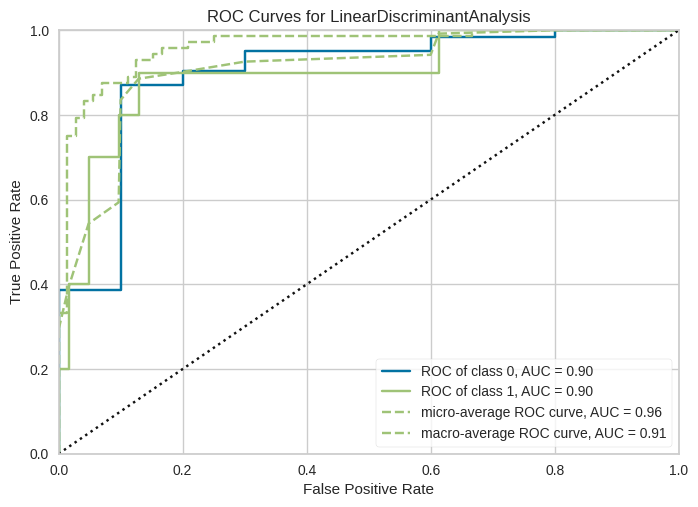

In [ ]:
expA.plot_model(lda)

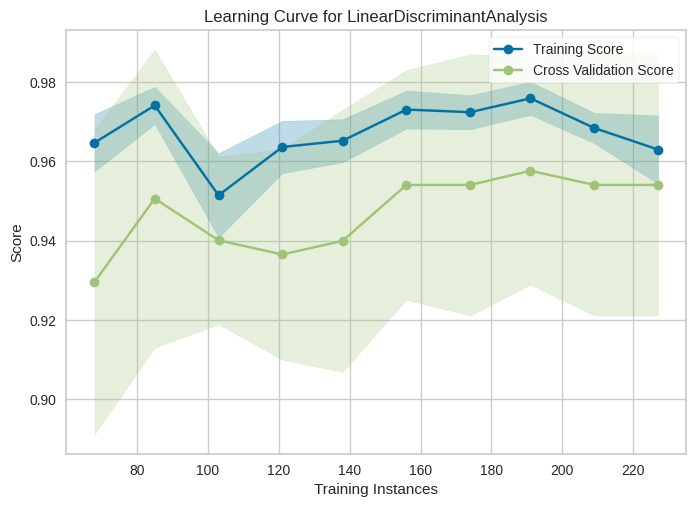

In [ ]:
expA.plot_model(lda, plot = 'learning')

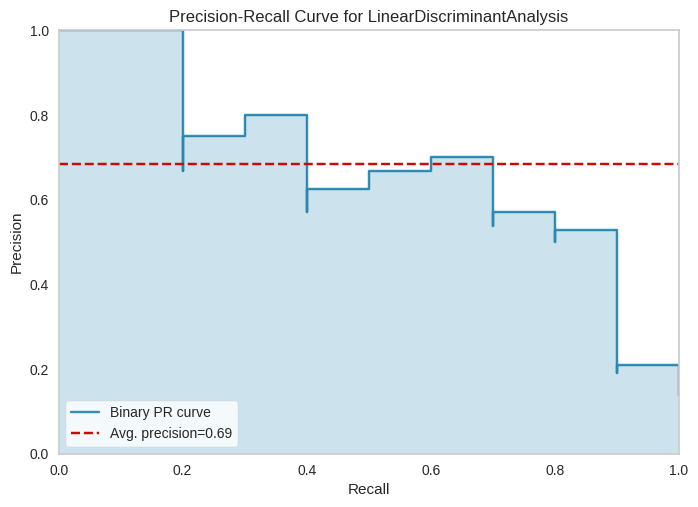

In [ ]:
expA.plot_model(lda, plot = 'pr')

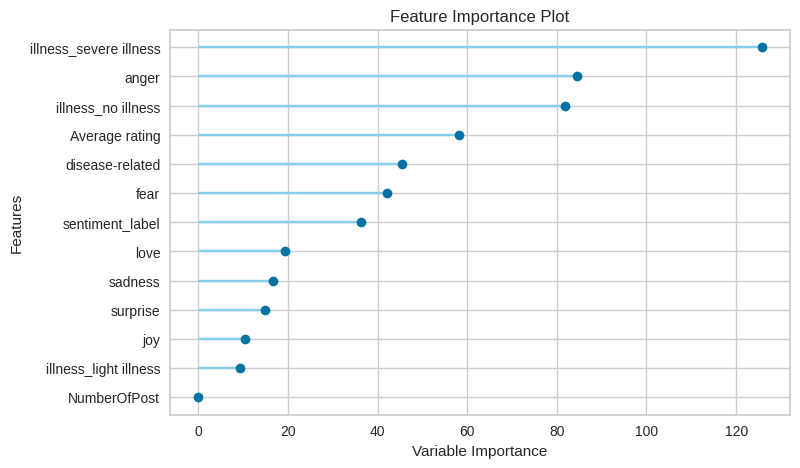

In [ ]:
expA.plot_model(lda, plot = 'feature_all')

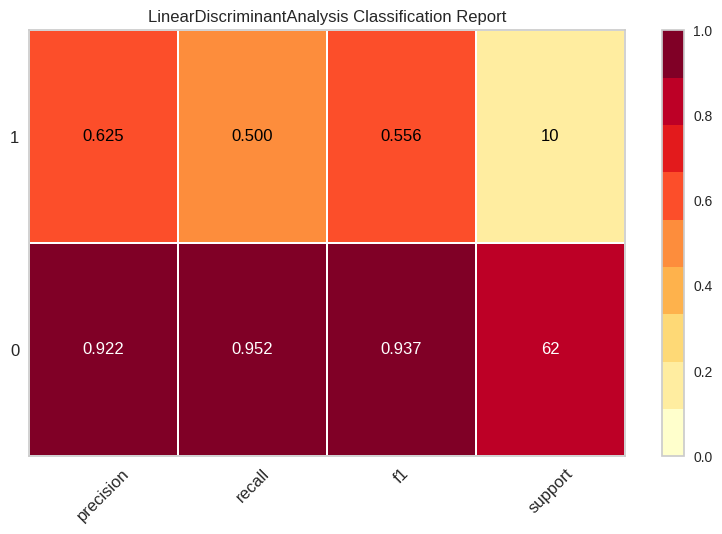

In [ ]:
expA.plot_model(lda, plot = 'class_report')

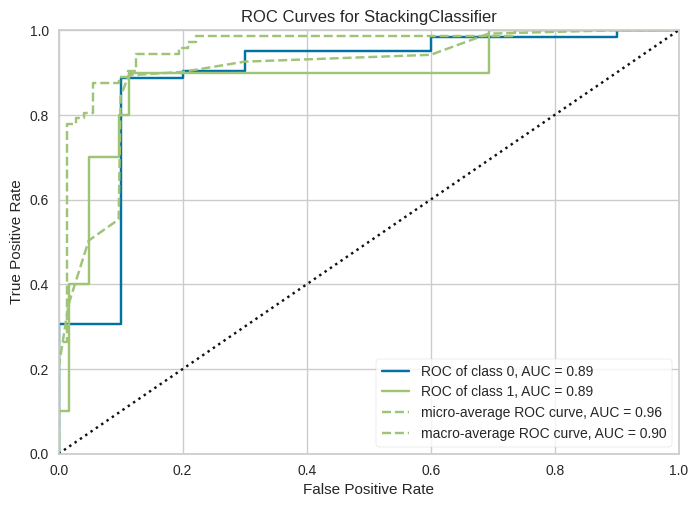

In [ ]:
expA.plot_model(stackerB)

##expD

In [ ]:
et_D = expD.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.8914,0.4286,0.5000,0.4615,0.3927,0.3942
1,0.8596,0.7643,0.5714,0.4444,0.5000,0.4198,0.4243
2,0.8772,0.9043,0.6250,0.5556,0.5882,0.5164,0.5176
3,0.8947,0.9515,0.3750,0.7500,0.5000,0.4484,0.4822
4,0.9107,0.8586,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.8839,0.8740,0.5143,0.5833,0.5330,0.4685,0.4771
Std,0.0174,0.0625,0.0954,0.1111,0.0585,0.0635,0.0624


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_D = expD.tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.8771,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8947,0.8457,0.1429,1.0000,0.2500,0.2262,0.3571
2,0.8772,0.9235,0.1250,1.0000,0.2222,0.1972,0.3307
3,0.8596,0.9184,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8929,0.8659,0.1429,1.0000,0.2500,0.2258,0.3568
Mean,0.8803,0.8861,0.0821,0.6000,0.1444,0.1298,0.2089
Std,0.0127,0.0302,0.0674,0.4899,0.1184,0.1065,0.1709


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
bagged_et_D = expD.ensemble_model(et, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.8957,0.4286,0.6000,0.5000,0.4430,0.4508
1,0.8421,0.8086,0.4286,0.3750,0.4000,0.3096,0.3105
2,0.8947,0.9260,0.6250,0.6250,0.6250,0.5638,0.5638
3,0.8772,0.9413,0.2500,0.6667,0.3636,0.3109,0.3571
4,0.9286,0.8353,0.5714,0.8000,0.6667,0.6279,0.6391
Mean,0.8875,0.8814,0.4607,0.6133,0.5111,0.4510,0.4643
Std,0.0281,0.0514,0.1309,0.1377,0.1195,0.1294,0.1231


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
xgboost_D = expD.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.7600,0.4286,0.5000,0.4615,0.3927,0.3942
1,0.8772,0.8929,0.5714,0.5000,0.5333,0.4630,0.4644
2,0.8772,0.9439,0.6250,0.5556,0.5882,0.5164,0.5176
3,0.8772,0.8431,0.5000,0.5714,0.5333,0.4630,0.4644
4,0.9464,0.8950,0.7143,0.8333,0.7692,0.7391,0.7419
Mean,0.8910,0.8670,0.5679,0.5921,0.5771,0.5148,0.5165
Std,0.0277,0.0623,0.0987,0.1240,0.1041,0.1188,0.1194


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost_D = expD.tune_model(xgboost_D)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.7586,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.8829,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8596,0.9209,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8596,0.8673,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8750,0.8280,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8697,0.8515,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0083,0.0552,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
bagged_xgboost_D = expD.ensemble_model(xgboost_D)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.8057,0.4286,0.5000,0.4615,0.3927,0.3942
1,0.8772,0.8743,0.5714,0.5000,0.5333,0.4630,0.4644
2,0.8596,0.9158,0.5000,0.5000,0.5000,0.4184,0.4184
3,0.9123,0.8520,0.3750,1.0000,0.5455,0.5078,0.5833
4,0.9286,0.8746,0.5714,0.8000,0.6667,0.6279,0.6391
Mean,0.8910,0.8645,0.4893,0.6600,0.5414,0.4819,0.4999
Std,0.0254,0.0359,0.0779,0.2059,0.0691,0.0829,0.0953


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_xgboost_D = expD.ensemble_model(xgboost_D, method = "Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8596,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8596,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8697,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0083,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stackerA_D = expD.stack_models(top3_expD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.8886,0.2857,0.6667,0.4000,0.3523,0.3906
1,0.8772,0.8229,0.5714,0.5000,0.5333,0.4630,0.4644
2,0.9123,0.9184,0.6250,0.7143,0.6667,0.6164,0.6182
3,0.8947,0.9362,0.2500,1.0000,0.4000,0.3643,0.4719
4,0.9464,0.8892,0.5714,1.0000,0.7273,0.7000,0.7338
Mean,0.9051,0.8910,0.4607,0.7762,0.5455,0.4992,0.5358
Std,0.0235,0.0386,0.1591,0.1961,0.1343,0.1380,0.1235


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

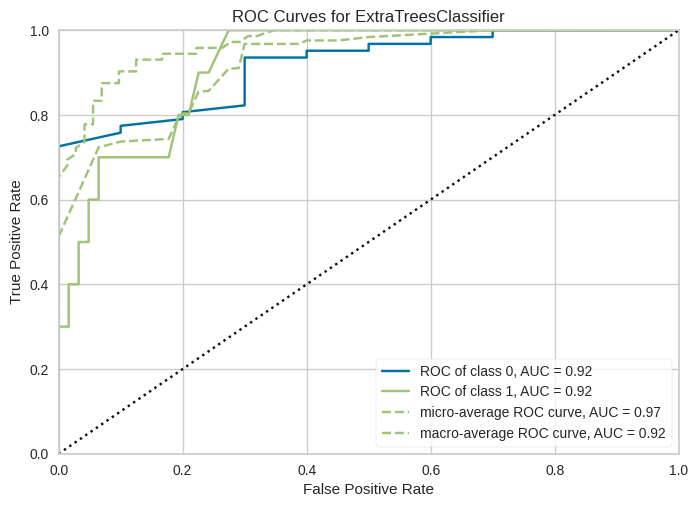

In [ ]:
expD.plot_model(et_D)

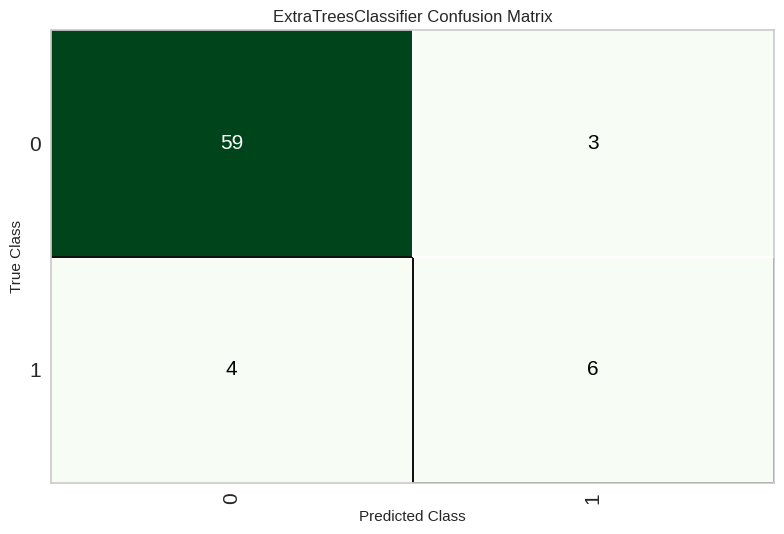

In [ ]:
expD.plot_model(et_D, plot = 'confusion_matrix')

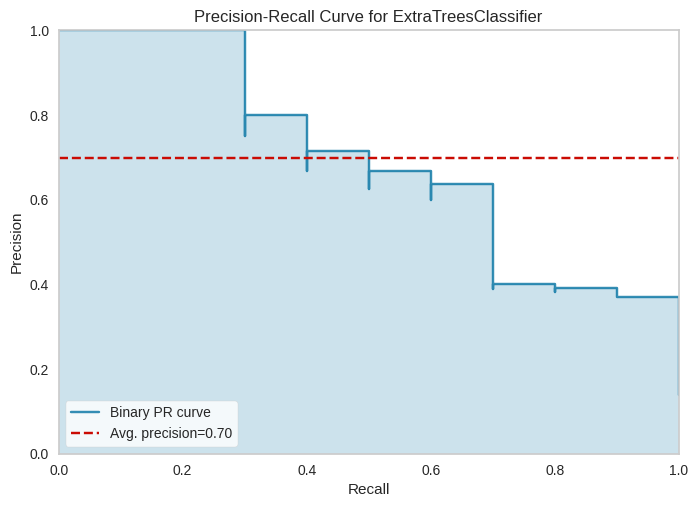

In [ ]:
expD.plot_model(et_D, plot = 'pr')

##finalize model

In [ ]:
final_expA = expA.finalize_model(lda)

In [ ]:
final_expA

Pipeline(memory=Memory(location=None),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [ ]:
final_expA_stacker = expA.finalize_model(stackerB)

In [ ]:
final_expA_stacker

Pipeline(memory=Memory(location=None),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 StackingClassifier(cv=5,
                                    estimators=[('Linear Discriminant Analysis',
                                                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                                                            n_components=None,
                                                                            priors=None,
                                                                            shri...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               objective='binary:logistic', ...))],
                                    final_estimator=LinearDiscriminantAnalysis(covariance_estimator=None,
                                                                               n_components=None,
                                                                               priors=None,
                                                                               shrinkage=None,
                                                                               solver='svd',
                                                                               store_covariance=False,
                                                                               tol=0.0001),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0))],
         verbose=False)

In [ ]:
expA.save_model(final_expA, '/content/drive/MyDrive/Colab Notebooks/DESN9002/model_lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
                  LinearDiscriminantAnalysis(covariance_estimator=None,
                                             n_components=None, priors=None,
                                             shrinkage=None, solver='svd',
                                             store_covariance=False,
                                             tol=0.0001))],
          verbose=False),
 '/content/drive/MyDrive/Colab Notebooks/DESN9002/model_lda.pkl')

In [ ]:
model_loaded = load_model('/content/drive/MyDrive/Colab Notebooks/DESN9002/model_lda')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
final_expD = expD.finalize_model(et_D)

In [ ]:
et_D

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
expD.save_model(final_expD, '/content/drive/MyDrive/Colab Notebooks/DESN9002/model_et_D')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['joy', 'love', 'sadness',
                                              'surprise', 'fear', 'anger',
                                              'disease-related',
                                              'sentiment_label',
                                              'Average rating', 'NumberOfPost',
                                              'illness_light illness',
                                              'illness_no illness',
                                              'illness_severe illness'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fil...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
  

#oversample & classification

##oversample

In [ ]:
data_0 = data_binary[data_binary['crisis'] == 0]
data_0

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness,crisis
0,2020-03-02,0,0.030802,0.001614,0.008962,0.003198,0.942573,0.012850,0.000000,0.396788,0.348703,2,0.500000,0.000000,0.500000,0
1,2020-03-03,0,0.464835,0.006583,0.210445,0.004030,0.156166,0.157942,1.000000,0.563771,0.199048,1,0.000000,1.000000,0.000000,0
2,2020-03-04,0,0.040440,0.002685,0.039322,0.002545,0.883447,0.031562,0.000000,0.443000,0.232520,1,0.000000,0.000000,1.000000,0
3,2020-03-06,0,0.299911,0.005154,0.188610,0.005715,0.158333,0.342277,0.000000,0.368819,0.523337,1,0.000000,0.000000,1.000000,0
4,2020-03-09,0,0.005408,0.000737,0.006073,0.001063,0.903466,0.083254,0.000000,0.399632,0.307440,1,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2021-04-09,780,0.256010,0.005111,0.047487,0.003959,0.425616,0.261818,0.000000,0.456086,0.355542,5,0.000000,0.500000,0.500000,0
344,2021-04-10,794,0.465927,0.004556,0.047396,0.003292,0.364357,0.114471,0.000000,0.479672,0.311029,5,0.076923,0.538462,0.384615,0
345,2021-04-11,839,0.597421,0.004485,0.022284,0.002618,0.103507,0.269685,0.333333,0.553774,0.295995,6,0.285714,0.428571,0.285714,0
346,2021-04-12,904,0.454613,0.003604,0.292111,0.002221,0.075087,0.172364,0.100000,0.428861,0.354207,10,0.250000,0.083333,0.666667,0


In [ ]:
data_1 = data_binary[data_binary['crisis'] == 1]
data_1

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness,crisis
100,2020-06-17,2003,0.355176,0.001919,0.343873,0.002023,0.240217,0.056793,0.000000,0.441413,0.269122,3,0.500000,0.250000,0.250000,1
135,2020-07-23,1129,0.696857,0.003397,0.022584,0.003402,0.185954,0.087805,0.200000,0.453958,0.323911,5,0.000000,0.600000,0.400000,1
151,2020-08-10,1007,0.945334,0.002168,0.035664,0.001061,0.005903,0.009871,0.000000,0.434099,0.176136,1,0.000000,1.000000,0.000000,1
155,2020-08-14,1007,0.610028,0.003180,0.042224,0.002524,0.252920,0.089125,0.166667,0.624947,0.354909,6,0.000000,0.666667,0.333333,1
157,2020-08-19,1092,0.657852,0.002917,0.105333,0.001856,0.097225,0.134817,0.000000,0.520389,0.345144,4,0.250000,0.750000,0.000000,1
164,2020-08-26,1059,0.680394,0.005398,0.047071,0.003873,0.169215,0.094049,0.000000,0.333163,0.297013,1,0.000000,1.000000,0.000000,1
165,2020-08-27,1023,0.668128,0.004439,0.024748,0.002411,0.147489,0.152785,0.000000,0.474490,0.326786,5,0.200000,0.800000,0.000000,1
166,2020-08-28,1057,0.973752,0.021314,0.001706,0.000455,0.000571,0.002201,1.000000,0.969521,0.261732,1,0.000000,0.500000,0.500000,1
170,2020-09-02,1045,0.131464,0.003035,0.037549,0.002697,0.387200,0.438055,0.000000,0.452750,0.365332,3,0.250000,0.750000,0.000000,1
171,2020-09-03,1043,0.582658,0.003601,0.052118,0.003035,0.254444,0.104144,0.166667,0.493183,0.382367,6,0.000000,0.833333,0.166667,1


In [ ]:
data_1_oversampled = data_1.sample(100, replace = True, random_state = 123)
data_1_oversampled

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness,crisis
360,2021-04-26,2812,0.552460,0.012874,0.112837,0.006918,0.143397,0.171513,0.204433,0.552854,0.348600,406,0.020168,0.638655,0.341176,1
151,2020-08-10,1007,0.945334,0.002168,0.035664,0.001061,0.005903,0.009871,0.000000,0.434099,0.176136,1,0.000000,1.000000,0.000000,1
190,2020-09-27,1124,0.615766,0.005805,0.038564,0.005213,0.127457,0.207195,0.000000,0.455394,0.229845,2,0.000000,0.333333,0.666667,1
349,2021-04-15,1038,0.426954,0.003906,0.065878,0.002995,0.251058,0.249208,0.071429,0.486305,0.357267,14,0.107143,0.142857,0.750000,1
353,2021-04-19,1619,0.248283,0.002931,0.121225,0.002544,0.325666,0.299351,0.076923,0.480582,0.318177,13,0.217391,0.217391,0.565217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2021-04-19,1619,0.248283,0.002931,0.121225,0.002544,0.325666,0.299351,0.076923,0.480582,0.318177,13,0.217391,0.217391,0.565217,1
181,2020-09-14,1136,0.394406,0.004426,0.049675,0.005282,0.238935,0.307276,0.250000,0.515783,0.328392,4,0.000000,0.750000,0.250000,1
165,2020-08-27,1023,0.668128,0.004439,0.024748,0.002411,0.147489,0.152785,0.000000,0.474490,0.326786,5,0.200000,0.800000,0.000000,1
174,2020-09-07,1016,0.503391,0.001807,0.446653,0.001276,0.016882,0.029990,0.000000,0.578548,0.383755,2,0.000000,0.666667,0.333333,1


In [ ]:
data_balanced = pd.concat([data_1_oversampled, data_0])
data_balanced

,Date,New_deaths,joy,love,sadness,surprise,fear,anger,sentiment_label,Average rating,disease-related,NumberOfPost,illness_light illness,illness_no illness,illness_severe illness,crisis
360,2021-04-26,2812,0.552460,0.012874,0.112837,0.006918,0.143397,0.171513,0.204433,0.552854,0.348600,406,0.020168,0.638655,0.341176,1
151,2020-08-10,1007,0.945334,0.002168,0.035664,0.001061,0.005903,0.009871,0.000000,0.434099,0.176136,1,0.000000,1.000000,0.000000,1
190,2020-09-27,1124,0.615766,0.005805,0.038564,0.005213,0.127457,0.207195,0.000000,0.455394,0.229845,2,0.000000,0.333333,0.666667,1
349,2021-04-15,1038,0.426954,0.003906,0.065878,0.002995,0.251058,0.249208,0.071429,0.486305,0.357267,14,0.107143,0.142857,0.750000,1
353,2021-04-19,1619,0.248283,0.002931,0.121225,0.002544,0.325666,0.299351,0.076923,0.480582,0.318177,13,0.217391,0.217391,0.565217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2021-04-09,780,0.256010,0.005111,0.047487,0.003959,0.425616,0.261818,0.000000,0.456086,0.355542,5,0.000000,0.500000,0.500000,0
344,2021-04-10,794,0.465927,0.004556,0.047396,0.003292,0.364357,0.114471,0.000000,0.479672,0.311029,5,0.076923,0.538462,0.384615,0
345,2021-04-11,839,0.597421,0.004485,0.022284,0.002618,0.103507,0.269685,0.333333,0.553774,0.295995,6,0.285714,0.428571,0.285714,0
346,2021-04-12,904,0.454613,0.003604,0.292111,0.002221,0.075087,0.172364,0.100000,0.428861,0.354207,10,0.250000,0.083333,0.666667,0


##train

In [ ]:
data_balanced.reset_index(drop=True, inplace=True)

In [ ]:
data_balanced.nunique()

Date                      358
New_deaths                287
joy                       358
love                      358
sadness                   358
surprise                  358
fear                      358
anger                     358
sentiment_label            63
Average rating            358
disease-related           358
NumberOfPost               51
illness_light illness      76
illness_no illness         93
illness_severe illness     86
crisis                      2
dtype: int64

In [ ]:
ignore_balanced = ['Date', 'NumberOfPost', 'New_deaths', 'sentiment_label']
numericals_balanced = ['joy', 'love', 'sadness', 'surprise', 'fear', 'anger', 'disease-related', 'Average rating', 'illness_light illness', 'illness_no illness', 'illness_severe illness']

In [ ]:
expZ = ClassificationExperiment()
expZ.setup(data_balanced, ignore_features=ignore_balanced,  target='crisis', session_id=123, train_size=0.8, preprocess=False, numeric_features=numericals_balanced, fold = 5)

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(415, 16)"
4,Transformed data shape,"(415, 12)"
5,Transformed train set shape,"(332, 12)"
6,Transformed test set shape,"(83, 12)"
7,Ignore features,4
8,Numeric features,11


In [ ]:
top3_expZ = expZ.compare_models(n_select = 3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9367,0.9416,0.7750,0.9600,0.8536,0.8141,0.8244,0.1980
xgboost,Extreme Gradient Boosting,0.8976,0.9252,0.8250,0.7809,0.7946,0.7270,0.7338,0.0740
rf,Random Forest Classifier,0.9307,0.9248,0.8000,0.9097,0.8454,0.8014,0.8084,0.5780
lightgbm,Light Gradient Boosting Machine,0.9156,0.9205,0.8000,0.8436,0.8193,0.7645,0.7663,0.0900
gbc,Gradient Boosting Classifier,0.9036,0.9114,0.8000,0.8263,0.8004,0.7376,0.7474,0.3460
ada,Ada Boost Classifier,0.8222,0.8282,0.6625,0.6482,0.6376,0.5228,0.5349,0.4080
dt,Decision Tree Classifier,0.8313,0.8163,0.7875,0.6375,0.6946,0.5822,0.5969,0.0440
knn,K Neighbors Classifier,0.7591,0.7915,0.4500,0.5028,0.4704,0.3163,0.3196,0.1000
lr,Logistic Regression,0.7561,0.6933,0.0375,0.3000,0.0667,0.0308,0.0503,0.0560
lda,Linear Discriminant Analysis,0.7379,0.6889,0.1375,0.3488,0.1937,0.0804,0.0891,0.0240


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
expY = ClassificationExperiment()
expY.setup(data_balanced, ignore_features=ignore_balanced,  target='crisis', session_id=123, train_size=0.8, feature_selection = True,n_features_to_select=5, numeric_features=numericals_balanced, fold = 5)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 80, number of negative: 252
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 332, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240964 -> initscore=-1.147402
[LightGBM] [Info] Start training from score -1.147402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(415, 16)"
4,Transformed data shape,"(415, 6)"
5,Transformed train set shape,"(332, 6)"
6,Transformed test set shape,"(83, 6)"
7,Ignore features,4
8,Numeric features,11
9,Preprocess,True


In [ ]:
top3_expY = expY.compare_models(n_select=3, sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9307,0.8996,0.7750,0.9290,0.8418,0.7981,0.8057,0.2540
xgboost,Extreme Gradient Boosting,0.8855,0.8856,0.7750,0.7622,0.7649,0.6895,0.6925,0.1120
lightgbm,Light Gradient Boosting Machine,0.8854,0.8712,0.7750,0.7589,0.7655,0.6898,0.6909,0.2180
rf,Random Forest Classifier,0.9157,0.8672,0.7875,0.8516,0.8170,0.7625,0.7644,0.4600
gbc,Gradient Boosting Classifier,0.8946,0.8652,0.7375,0.8105,0.7693,0.7015,0.7050,0.1600
ada,Ada Boost Classifier,0.8193,0.8323,0.5500,0.6544,0.5872,0.4747,0.4841,0.1540
dt,Decision Tree Classifier,0.8224,0.8148,0.8000,0.6013,0.6844,0.5647,0.5780,0.1060
knn,K Neighbors Classifier,0.7559,0.7436,0.4250,0.4967,0.4565,0.3006,0.3030,0.1300
lda,Linear Discriminant Analysis,0.7500,0.5629,0.0125,0.0667,0.0211,-0.0053,-0.0183,0.0620
lr,Logistic Regression,0.7590,0.5377,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
et_Y = expY.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9552,0.9596,0.8750,0.9333,0.9032,0.8741,0.8749
1,0.9254,0.9013,0.6875,1.0000,0.8148,0.7701,0.7913
2,0.9242,0.8994,0.8125,0.8667,0.8387,0.7893,0.7900
3,0.9394,0.9312,0.8125,0.9286,0.8667,0.8277,0.8308
4,0.9091,0.8062,0.6875,0.9167,0.7857,0.7295,0.7417
Mean,0.9307,0.8996,0.7750,0.9290,0.8418,0.7981,0.8057
Std,0.0156,0.0516,0.0750,0.0427,0.0407,0.0494,0.0447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_Y = expY.tune_model(et_Y)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7612,0.7512,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7761,0.6630,0.0625,1.0000,0.1176,0.0921,0.2198
2,0.7576,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7576,0.7737,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7576,0.7012,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.7620,0.7378,0.0125,0.2000,0.0235,0.0184,0.0440
Std,0.0072,0.0495,0.0250,0.4000,0.0471,0.0369,0.0879


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
xgboost_Y = expY.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8806,0.9240,0.8750,0.7000,0.7778,0.6975,0.7056
1,0.8955,0.8578,0.6875,0.8462,0.7586,0.6929,0.6989
2,0.8939,0.9350,0.8125,0.7647,0.7879,0.7173,0.7178
3,0.9091,0.9425,0.8125,0.8125,0.8125,0.7525,0.7525
4,0.8485,0.7688,0.6875,0.6875,0.6875,0.5875,0.5875
Mean,0.8855,0.8856,0.7750,0.7622,0.7649,0.6895,0.6925
Std,0.0206,0.0657,0.0750,0.0617,0.0424,0.0552,0.0556


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost_Y = expY.tune_model(xgboost_Y)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8060,0.9314,0.8750,0.5600,0.6829,0.5526,0.5812
1,0.7761,0.8505,0.7500,0.5217,0.6154,0.4646,0.4798
2,0.7727,0.9125,0.8125,0.5200,0.6341,0.4806,0.5058
3,0.8333,0.9425,0.9375,0.6000,0.7317,0.6191,0.6515
4,0.8030,0.8000,0.6875,0.5789,0.6286,0.4959,0.4993
Mean,0.7982,0.8874,0.8125,0.5561,0.6585,0.5226,0.5435
Std,0.0222,0.0540,0.0884,0.0315,0.0431,0.0567,0.0641


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
lightgbm_Y = expY.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9403,0.9326,0.8750,0.8750,0.8750,0.8358,0.8358
1,0.8806,0.8419,0.6875,0.7857,0.7333,0.6569,0.6593
2,0.8939,0.8900,0.8125,0.7647,0.7879,0.7173,0.7178
3,0.8788,0.9462,0.8125,0.7222,0.7647,0.6835,0.6856
4,0.8333,0.7450,0.6875,0.6471,0.6667,0.5557,0.5561
Mean,0.8854,0.8712,0.7750,0.7589,0.7655,0.6898,0.6909
Std,0.0342,0.0729,0.0750,0.0749,0.0683,0.0907,0.0904


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm_Y = expY.create_model(lightgbm_Y)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9403,0.9326,0.8750,0.8750,0.8750,0.8358,0.8358
1,0.8806,0.8419,0.6875,0.7857,0.7333,0.6569,0.6593
2,0.8939,0.8900,0.8125,0.7647,0.7879,0.7173,0.7178
3,0.8788,0.9462,0.8125,0.7222,0.7647,0.6835,0.6856
4,0.8333,0.7450,0.6875,0.6471,0.6667,0.5557,0.5561
Mean,0.8854,0.8712,0.7750,0.7589,0.7655,0.6898,0.6909
Std,0.0342,0.0729,0.0750,0.0749,0.0683,0.0907,0.0904


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
stacker1_Y = expY.stack_models(estimator_list = top3_expY)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9552,0.9559,0.8750,0.9333,0.9032,0.8741,0.8749
1,0.9254,0.8860,0.6875,1.0000,0.8148,0.7701,0.7913
2,0.9545,0.9200,0.8125,1.0000,0.8966,0.8678,0.8755
3,0.9545,0.9375,0.8125,1.0000,0.8966,0.8678,0.8755
4,0.9091,0.7962,0.6875,0.9167,0.7857,0.7295,0.7417
Mean,0.9398,0.8991,0.7750,0.9700,0.8594,0.8219,0.8318
Std,0.0191,0.0564,0.0750,0.0371,0.0492,0.0603,0.0556


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

choose stacker1_Y / et_Y

##plot

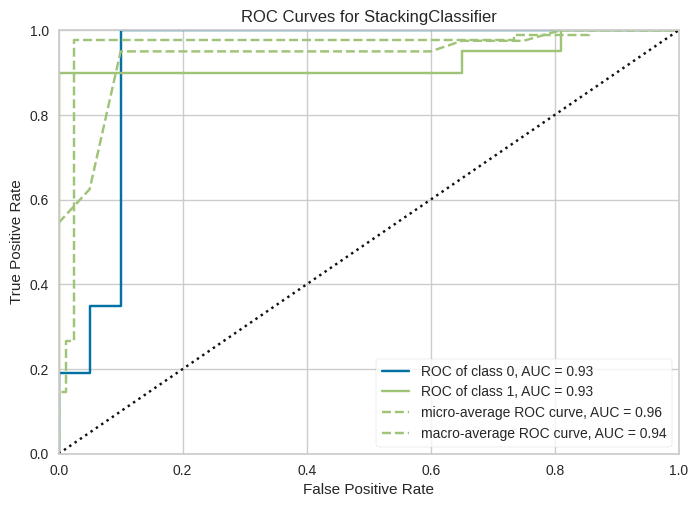

In [ ]:
expY.plot_model(stacker1_Y, plot = 'auc')

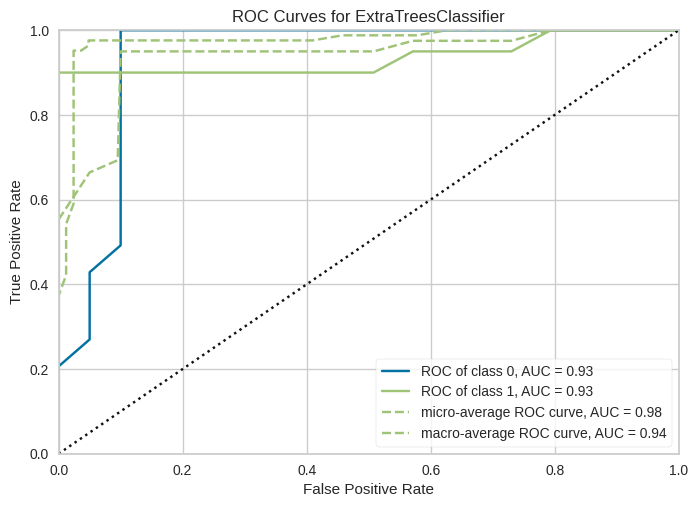

In [ ]:
expY.plot_model(et_Y, plot = 'auc')

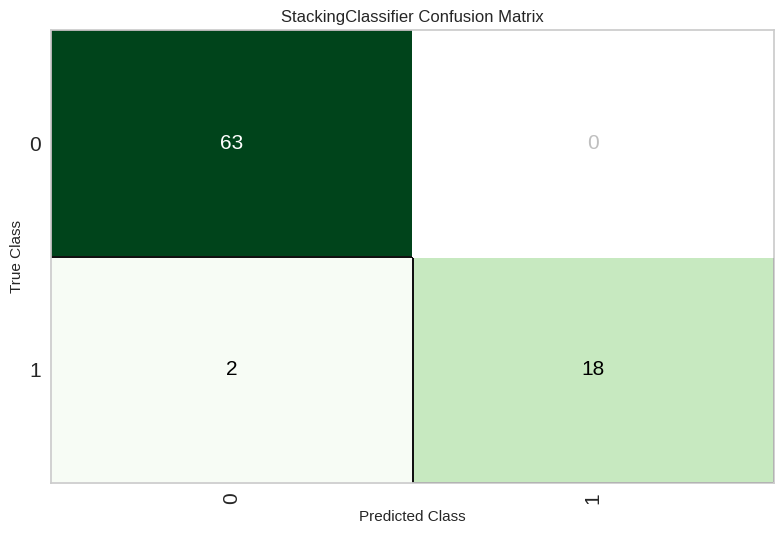

In [ ]:
expY.plot_model(stacker1_Y, plot="confusion_matrix")

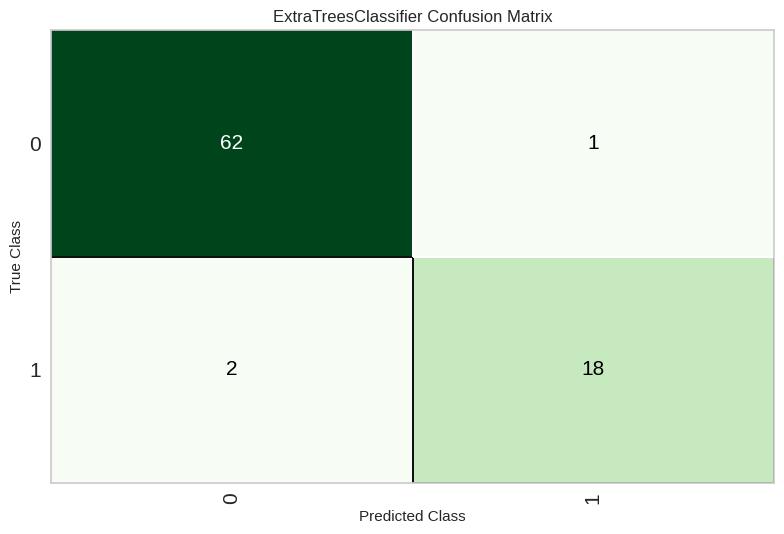

In [ ]:
expY.plot_model(et_Y, plot='confusion_matrix')

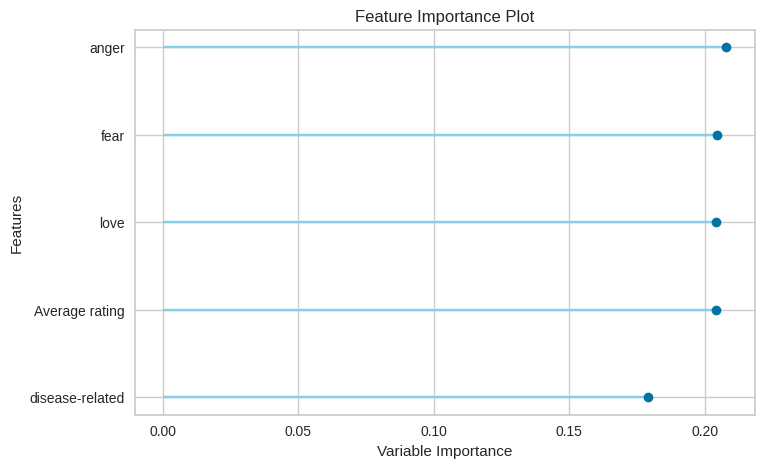

In [ ]:
expY.plot_model(et_Y, plot='feature')

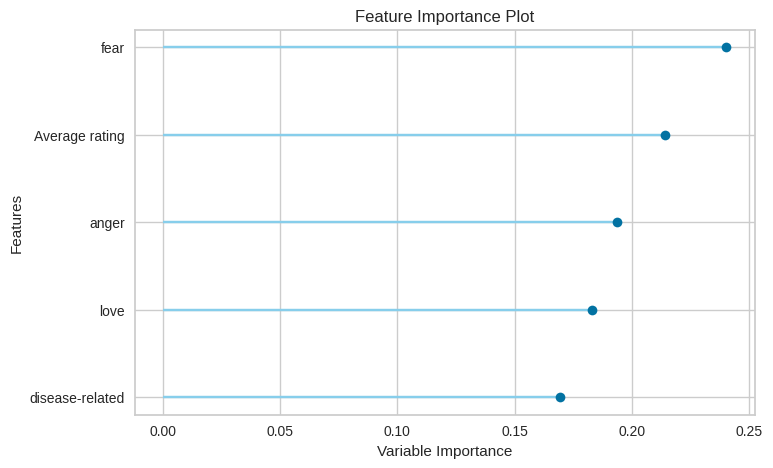

In [ ]:
expY.plot_model(xgboost_Y, plot='feature')

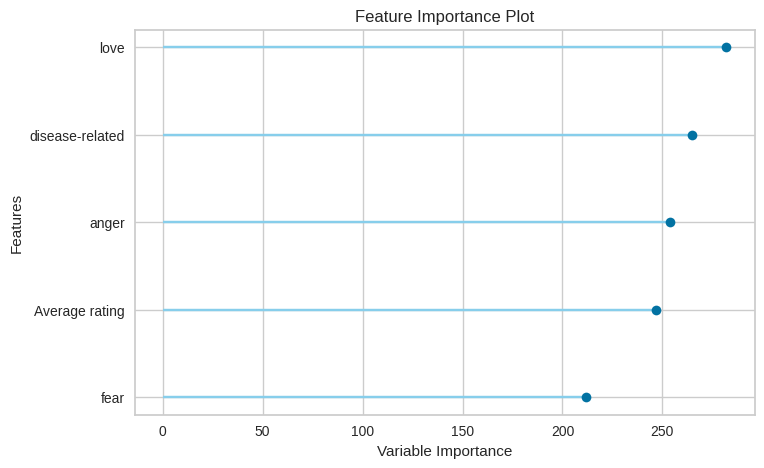

In [ ]:
expY.plot_model(lightgbm_Y, plot='feature')

#trying other features combinations

In [ ]:
numericals_2   = ['fear','anger','disease-related','sentiment_label','Average rating', 'illness_no illness', "illness_severe illness"]
ignore_2      = ['Date', 'New_deaths',"NumberOfPost", "illness_light illness", "joy", 'surprise', 'sadness' ,'love',]

In [ ]:
exp2A = ClassificationExperiment()
exp2A.setup(data, ignore_features=ignore_2,  target='crisis', session_id=123, train_size=0.8, preprocess=False, numeric_features=numericals_2, fold = 5)

,Description,Value
0,Session id,123
1,Target,crisis
2,Target type,Binary
3,Original data shape,"(356, 16)"
4,Transformed data shape,"(356, 8)"
5,Transformed train set shape,"(284, 8)"
6,Transformed test set shape,"(72, 8)"
7,Ignore features,8
8,Numeric features,7


In [ ]:
top3_exp2A = exp2A.compare_models(n_select=3, sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9506,0.9665,0.7821,0.8206,0.7970,0.7691,0.7718,0.0240
et,Extra Trees Classifier,0.9401,0.9639,0.6464,0.8648,0.7355,0.7026,0.7144,0.1800
xgboost,Extreme Gradient Boosting,0.9295,0.9502,0.6214,0.8095,0.7000,0.6607,0.6700,0.0560
knn,K Neighbors Classifier,0.9331,0.9449,0.7286,0.7914,0.7426,0.7049,0.7152,0.0660
rf,Random Forest Classifier,0.9260,0.9385,0.5679,0.8200,0.6678,0.6277,0.6429,0.2240
lightgbm,Light Gradient Boosting Machine,0.9225,0.9323,0.5964,0.7917,0.6712,0.6284,0.6416,0.1280
gbc,Gradient Boosting Classifier,0.9259,0.9303,0.5964,0.8143,0.6802,0.6396,0.6543,0.1260
qda,Quadratic Discriminant Analysis,0.9226,0.9290,0.7036,0.7211,0.7060,0.6617,0.6655,0.0240
nb,Naive Bayes,0.8979,0.9273,0.6500,0.6440,0.6336,0.5761,0.5843,0.0240
ada,Ada Boost Classifier,0.8977,0.8495,0.5143,0.6867,0.5747,0.5189,0.5335,0.1160


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
lda2 = exp2A.create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9771,0.8571,0.8571,0.8571,0.8371,0.8371
1,0.9649,0.9743,0.8571,0.8571,0.8571,0.8371,0.8371
2,0.9298,0.9337,0.6250,0.8333,0.7143,0.6752,0.6843
3,0.9825,1.0000,1.0000,0.8889,0.9412,0.9309,0.9331
4,0.9107,0.9475,0.5714,0.6667,0.6154,0.5652,0.5674
Mean,0.9506,0.9665,0.7821,0.8206,0.7970,0.7691,0.7718
Std,0.0263,0.0234,0.1599,0.0790,0.1165,0.1310,0.1296


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#Regrssion


##set up experiment

In [ ]:
data.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (356, 15)


In [ ]:
data.nunique()

Date                      356
New_deaths                291
joy                       356
love                      356
sadness                   356
surprise                  356
fear                      356
anger                     356
disease-related           356
sentiment_label           356
Average rating            356
NumberOfPost               51
illness_light illness      76
illness_no illness        356
illness_severe illness    356
dtype: int64

In [ ]:
numericals   = ['joy', 'love', 'sadness', 'surprise','fear','anger','disease-related','sentiment_label','Average rating', 'NumberOfPost', 'illness_light illness', 'illness_no illness', "illness_severe illness"]
ignore       = ['Date']

In [ ]:
from pycaret.regression import *

In [ ]:
#experiment1 = no preprocessing
exp1 = RegressionExperiment()
exp1.setup(data, ignore_features=ignore,  target='New_deaths', session_id=123, train_size=0.8, preprocess=False, numeric_features=numericals, fold = 5)

,Description,Value
0,Session id,123
1,Target,New_deaths
2,Target type,Regression
3,Original data shape,"(356, 15)"
4,Transformed data shape,"(356, 14)"
5,Transformed train set shape,"(284, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,1
8,Numeric features,13


In [ ]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,110.3926,34275.9587,179.7622,0.8504,0.9236,4.2018,0.2220
gbr,Gradient Boosting Regressor,135.0185,49382.7493,210.0215,0.7983,0.9802,4.1751,0.1240
rf,Random Forest Regressor,138.4666,58288.9319,234.0617,0.7547,1.0349,8.1749,0.4280
lightgbm,Light Gradient Boosting Machine,153.2227,55931.0312,230.9993,0.7518,1.1807,7.2872,0.1940
xgboost,Extreme Gradient Boosting,137.1068,65578.9207,238.3322,0.7422,0.9131,2.2624,0.2000
ada,AdaBoost Regressor,183.5582,61329.0961,243.4327,0.7184,1.1503,5.9888,0.1020
lr,Linear Regression,188.5909,71563.5314,259.4157,0.6833,1.2608,5.8791,0.0200
lasso,Lasso Regression,192.2669,77832.3378,270.5733,0.6606,1.2626,7.4644,0.0340
llar,Lasso Least Angle Regression,192.2429,77833.3000,270.5730,0.6606,1.2626,7.4656,0.0300
huber,Huber Regressor,190.8347,82260.6820,278.3028,0.6398,1.3151,8.3257,0.0780


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
exp2 = RegressionExperiment()
exp2.setup(data, ignore_features=ignore,  target='New_deaths', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, normalize=True , remove_outliers=True, ordinal_features=None)

,Description,Value
0,Session id,123
1,Target,New_deaths
2,Target type,Regression
3,Original data shape,"(356, 15)"
4,Transformed data shape,"(341, 14)"
5,Transformed train set shape,"(269, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,1
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,156.9366,64594.2083,240.0845,0.7136,1.1796,7.3795,0.4220
gbr,Gradient Boosting Regressor,148.6314,63594.3830,237.9424,0.7045,1.1224,9.9033,0.7180
et,Extra Trees Regressor,121.8227,59002.2524,219.5422,0.6905,1.0139,9.9440,0.4050
rf,Random Forest Regressor,142.7606,69893.7263,248.8313,0.6796,1.0786,9.7953,0.6800
ada,AdaBoost Regressor,200.3885,81048.1018,272.7709,0.6273,1.3526,12.1085,0.4160
xgboost,Extreme Gradient Boosting,148.5372,81437.7009,262.3706,0.5822,1.0491,8.4417,0.4330
br,Bayesian Ridge,186.0062,77195.0782,265.8796,0.5641,1.2880,8.7888,0.4350
ridge,Ridge Regression,186.5669,77775.8767,266.8043,0.5605,1.2781,8.7690,0.3910
llar,Lasso Least Angle Regression,186.7890,78316.0171,267.7138,0.5566,1.2608,8.8615,0.2570
lasso,Lasso Regression,186.7888,78319.4547,267.7186,0.5566,1.2607,8.8625,0.4960


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
exp3 = RegressionExperiment()
exp3.setup(data, ignore_features=ignore,  target='New_deaths', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals,feature_selection = True, remove_multicollinearity = True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 13
[LightGBM] [Info] Start training from score 492.257042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

,Description,Value
0,Session id,123
1,Target,New_deaths
2,Target type,Regression
3,Original data shape,"(356, 15)"
4,Transformed data shape,"(356, 3)"
5,Transformed train set shape,"(284, 3)"
6,Transformed test set shape,"(72, 3)"
7,Ignore features,1
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_exp3 = exp3.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,234.2845,104723.0675,314.5850,0.4763,1.2921,5.6448,0.2000
gbr,Gradient Boosting Regressor,239.6060,114573.9496,328.1487,0.4316,1.3392,7.1252,0.1140
rf,Random Forest Regressor,235.5895,112773.2976,324.3158,0.4125,1.2588,6.8422,0.3940
lightgbm,Light Gradient Boosting Machine,257.4253,122823.3311,343.0556,0.3586,1.4094,10.9334,0.3380
ada,AdaBoost Regressor,272.6112,127365.8909,344.8980,0.3384,1.4070,10.7703,0.1040
knn,K Neighbors Regressor,272.2206,153027.7959,374.9377,0.2792,1.4284,10.8603,0.1180
xgboost,Extreme Gradient Boosting,265.0064,143273.5273,371.1745,0.2371,1.3867,5.4918,0.1800
huber,Huber Regressor,304.9234,196299.1273,431.9480,0.0983,1.6346,17.8847,0.0880
llar,Lasso Least Angle Regression,312.1316,197130.5563,434.2517,0.0785,1.6669,18.4558,0.0610
lasso,Lasso Regression,312.1323,197130.8084,434.2520,0.0785,1.6669,18.4556,0.0590


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
exp4 = RegressionExperiment()
exp4.setup(data, ignore_features=ignore,  target='New_deaths', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, remove_multicollinearity = True)

,Description,Value
0,Session id,123
1,Target,New_deaths
2,Target type,Regression
3,Original data shape,"(356, 15)"
4,Transformed data shape,"(356, 14)"
5,Transformed train set shape,"(284, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,1
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_exp4 = exp4.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,106.1610,34271.7968,172.3429,0.8475,0.8411,3.7632,0.3650
gbr,Gradient Boosting Regressor,127.4712,42752.9708,191.6079,0.8250,0.8970,3.9152,0.2000
lightgbm,Light Gradient Boosting Machine,143.2660,47827.5692,208.3266,0.7826,1.0772,6.2025,0.0890
dt,Decision Tree Regressor,129.5611,52568.6271,222.6321,0.7548,0.6033,0.6459,0.0320
rf,Random Forest Regressor,130.9620,55756.8473,220.7267,0.7445,0.9277,5.9238,0.2910
xgboost,Extreme Gradient Boosting,123.7564,53523.8225,217.4036,0.7195,0.8199,1.7832,0.2370
ada,AdaBoost Regressor,188.2083,62444.7064,244.2716,0.6996,1.1422,5.8412,0.2290
lr,Linear Regression,189.4270,72068.2780,258.5727,0.6156,1.2710,5.7290,0.0390
llar,Lasso Least Angle Regression,193.2196,79010.6960,269.9238,0.5779,1.2730,7.3635,0.0330
lasso,Lasso Regression,193.2408,79012.8568,269.9293,0.5779,1.2728,7.3627,0.0310


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
exp5 = RegressionExperiment()
exp5.setup(data, ignore_features=ignore,  target='New_deaths', session_id=123, train_size=0.8, preprocess=True, numeric_features=numericals, fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False)

,Description,Value
0,Session id,123
1,Target,New_deaths
2,Target type,Regression
3,Original data shape,"(356, 15)"
4,Transformed data shape,"(356, 14)"
5,Transformed train set shape,"(284, 14)"
6,Transformed test set shape,"(72, 14)"
7,Ignore features,1
8,Numeric features,13
9,Preprocess,True


In [ ]:
top3_exp5 = exp5.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,211.8565,79497.4080,260.1558,-11.6856,0.5793,0.5392,0.1860
rf,Random Forest Regressor,211.5465,81830.2436,261.5643,-11.8679,0.6021,0.5420,0.3870
lightgbm,Light Gradient Boosting Machine,244.2969,102841.5888,292.9601,-13.3298,0.7623,0.6286,0.0610
gbr,Gradient Boosting Regressor,217.7802,88422.0218,274.1991,-13.3924,0.6232,0.5677,0.0980
xgboost,Extreme Gradient Boosting,230.6091,102245.0894,283.0415,-13.8829,0.6557,0.5818,0.1360
lr,Linear Regression,211.4509,82239.8506,264.0241,-14.4513,0.5538,0.5457,0.0260
ada,AdaBoost Regressor,236.2614,91571.4899,278.5394,-15.1335,0.6371,0.6091,0.0960
huber,Huber Regressor,240.5174,94700.7503,280.9330,-15.6135,0.6280,0.5943,0.0860
llar,Lasso Least Angle Regression,241.8200,93618.2339,281.5301,-15.6660,0.7566,0.6420,0.0230
lasso,Lasso Regression,241.8491,93634.6576,281.5575,-15.6703,0.7566,0.6421,0.0280


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

exp1 and 4 are the best!!!

## create and tune

In [ ]:
et = exp4.create_model('et', return_train_score = True, fold = 5,)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et = exp4.tune_model(et, return_train_score = True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


et > tuned_et

In [ ]:
gbr = exp4.create_model('gbr', return_train_score = True, fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbr = exp4.tune_model(gbr,  return_train_score = True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


gbr > tuned_gbr

In [ ]:
rf = exp4.create_model('rf', return_train_score = True, fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = exp4.tune_model(rf, return_train_score = True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rf < tuned_rf

In [ ]:
dt = exp4.create_model('dt', return_train_score = True, fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_dt = exp4.tune_model(dt, return_train_score = True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


dt > tuned_dt

In [ ]:
xgboost = exp4.create_model('xgboost', return_train_score = True, fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost = exp4.tune_model(xgboost, return_train_score = True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


xgboost < tuned_xgboost

In [ ]:
lightgbm = exp4.create_model('lightgbm', return_train_score = True, fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = exp4.tune_model(lightgbm, return_train_score=True, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


lightgbm < tuned_lightgbm

##ensemble

In [ ]:
bagged_et = exp1.ensemble_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,166.8527,84828.3709,291.2531,0.6497,1.2235,0.7179
1,160.2082,60866.2525,246.7109,0.7085,1.2838,21.6686
2,183.0256,66689.4071,258.2429,0.8037,0.5898,0.6695
3,102.1990,17383.7846,131.8476,0.8279,0.9881,3.8456
4,146.3087,45660.0818,213.6822,0.8195,0.8534,4.2847
Mean,151.7188,55085.5794,228.3473,0.7619,0.9877,6.2373
Std,27.4325,22640.5123,54.2501,0.0705,0.2529,7.8629


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

et > bagged_et

In [ ]:
boosted_et = exp1.ensemble_model(et, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,171.7705,84442.7295,290.5903,0.6513,1.3519,1.3161
1,146.7954,38502.0271,196.2193,0.8156,1.1050,7.0205
2,192.3296,68860.4567,262.4128,0.7973,0.6629,0.8298
3,103.0323,17865.7793,133.6629,0.8231,1.1231,4.3806
4,143.9873,37631.7828,193.9891,0.8513,0.8819,4.0950
Mean,151.5830,49460.5551,215.3749,0.7877,1.0250,3.5284
Std,30.0187,23909.6121,55.4456,0.0704,0.2343,2.2547


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

et > boosted_et

In [ ]:
bagged_gbr = exp1.ensemble_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,179.3371,92373.5749,303.9302,0.6186,1.2330,0.8021
1,168.3820,61515.3125,248.0228,0.7054,1.2979,15.9221
2,213.5108,85120.7202,291.7546,0.7494,0.6287,0.7703
3,117.7273,26275.9175,162.0985,0.7398,1.3032,6.5734
4,164.1244,53642.7232,231.6090,0.7880,0.8467,5.2449
Mean,168.6163,63785.6497,247.4830,0.7202,1.0619,5.8626
Std,30.7908,23611.3028,50.3767,0.0572,0.2746,5.5429


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

gbr < bagged_gbr

In [ ]:
boosted_gbr = exp1.ensemble_model(gbr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,182.1586,94783.2227,307.8688,0.6086,1.2534,1.5252
1,133.7803,41564.3981,203.8735,0.8009,0.9231,1.3841
2,217.1772,91765.4073,302.9281,0.7298,0.6402,0.7777
3,132.6562,29151.7974,170.7390,0.7113,1.2674,7.9003
4,164.3417,48628.1762,220.5180,0.8078,0.8445,3.5524
Mean,166.0228,61178.6004,241.1855,0.7317,0.9857,3.0279
Std,31.7266,26954.6641,54.8468,0.0723,0.2426,2.6092


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

gbr < boosted_gbr ~ boosted_gbr (prefer baaged_gbr, lower std)

In [ ]:
bagged_rf = exp1.ensemble_model(tuned_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,189.4380,105731.6684,325.1641,0.5634,1.2516,0.7372
1,162.7892,47436.8398,217.8000,0.7728,1.1863,10.9784
2,212.8942,96355.7746,310.4123,0.7163,0.6174,0.7095
3,126.6118,27189.0943,164.8912,0.7308,1.1965,5.5616
4,166.8442,52666.4235,229.4917,0.7919,0.9123,5.5584
Mean,171.7155,65875.9601,249.5518,0.7150,1.0328,4.7090
Std,28.8011,30095.3923,59.9987,0.0806,0.2389,3.8085


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_rf > bagged_rf

In [ ]:
boosted_rf = exp1.ensemble_model(tuned_rf, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,181.7278,93280.9689,305.4193,0.6148,1.2717,1.2161
1,144.3459,39829.7173,199.5738,0.8092,0.8506,1.2467
2,218.2606,92992.2828,304.9464,0.7262,0.6880,0.8761
3,129.2461,25941.7069,161.0643,0.7431,1.2609,6.5494
4,164.0050,45485.2465,213.2727,0.8202,0.9088,5.3360
Mean,167.5171,59505.9845,236.8553,0.7427,0.9960,3.0449
Std,30.9540,28186.4473,58.3571,0.0736,0.2323,2.4005


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_rf ~ boosted_rf

In [ ]:
bagged_dt = exp1.ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,162.3596,98620.0356,314.0383,0.5928,1.1568,0.4651
1,172.5351,56513.4644,237.7256,0.7293,1.2938,13.3772
2,222.0667,103272.1032,321.3598,0.6959,0.6690,0.7804
3,114.2018,26958.7911,164.1913,0.7330,0.8155,1.1598
4,153.0161,50101.5255,223.8337,0.8020,0.8187,5.3756
Mean,164.8358,67093.1839,252.2297,0.7106,0.9508,4.2316
Std,34.7686,29374.3868,58.9351,0.0683,0.2347,4.9089


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

df < bagged_df

In [ ]:
boosted_dt = exp1.ensemble_model(dt, method = "Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,147.2807,90733.3509,301.2198,0.6253,0.6427,0.4403
1,113.9649,43397.1930,208.3199,0.7921,0.5263,0.3419
2,182.3333,113907.7018,337.5022,0.6646,0.4913,0.4506
3,87.7368,17987.0000,134.1156,0.8219,0.7755,2.4955
4,118.1607,46113.1250,214.7397,0.8178,0.5078,0.4990
Mean,129.8953,62427.6741,239.1794,0.7444,0.5887,0.8455
Std,32.3135,34798.5684,72.2556,0.0827,0.1075,0.8266


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

df < boosted_df ~ bagged_df

In [ ]:
bagged_xgboost = exp1.ensemble_model(tuned_xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,185.5016,110249.5647,332.0385,0.5448,1.2573,0.9049
1,158.9940,54228.0727,232.8692,0.7403,1.3789,15.9081
2,198.7193,80389.9848,283.5313,0.7633,0.6038,0.6883
3,114.7278,21573.6454,146.8797,0.7864,1.3283,4.8151
4,150.9195,45849.2094,214.1243,0.8188,0.9027,4.7865
Mean,161.7725,62458.0954,241.8886,0.7307,1.0942,5.4206
Std,29.2125,30399.6836,62.8331,0.0965,0.2965,5.5415


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_xgboost > bagged_xgboost

In [ ]:
boosted_xgboost = exp1.ensemble_model(tuned_xgboost, method = "Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,165.7129,92649.6953,304.3841,0.6174,1.1082,0.6671
1,150.4628,42850.3456,207.0033,0.7948,0.7474,1.1821
2,193.7618,77205.1926,277.8582,0.7727,0.5690,0.6189
3,117.5140,27002.5176,164.3244,0.7326,1.3285,6.8768
4,141.7426,45163.1340,212.5162,0.8215,0.8142,2.2685
Mean,153.8388,56974.1770,233.2172,0.7478,0.9135,2.3227
Std,25.3458,24163.2792,50.8320,0.0714,0.2707,2.3532


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_xgboost ~ boosted_xgboost

In [ ]:
bagged_lightgbm = exp1.ensemble_model(tuned_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,191.6788,99462.3451,315.3765,0.5893,1.2987,1.1460
1,176.1334,59903.2796,244.7515,0.7131,1.2774,6.5156
2,209.0911,83511.5954,288.9837,0.7541,0.6896,0.9374
3,126.8803,29671.3004,172.2536,0.7062,1.2731,8.5384
4,157.4202,43376.6992,208.2707,0.8286,0.9438,4.5903
Mean,172.2408,63185.0440,245.9272,0.7183,1.0965,4.3455
Std,28.3837,25516.7505,52.0082,0.0778,0.2424,2.9733


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_lightgbm < bagged_lightgbm

In [ ]:
boosted_lightgbm = exp1.ensemble_model(tuned_lightgbm, method = "Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,187.3346,101149.8699,318.0407,0.5823,1.2117,0.8155
1,151.9087,43658.9916,208.9473,0.7909,1.1567,3.4208
2,219.1085,94370.4318,307.1977,0.7222,0.6071,0.7337
3,136.8424,34754.9377,186.4268,0.6558,1.3602,4.3350
4,148.3921,37904.3268,194.6903,0.8502,0.9028,4.5869
Mean,168.7173,62367.7116,243.0606,0.7203,1.0477,2.7784
Std,30.3233,29117.5843,57.3522,0.0949,0.2651,1.6817


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

tuned_lightgbm < boosted_lightgbm ~ bagged_lightgbm (prefer bagged_lightgbm, lower std)

##stack

In [ ]:
stacker1 = exp1.stack_models(estimator_list=[et, bagged_gbr, boosted_rf, boosted_dt, boosted_xgboost, bagged_lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,177.6710,91289.7326,302.1419,0.6230,1.2925,2.7640
1,145.4186,39204.7079,198.0018,0.8122,1.2741,8.4553
2,156.4969,56348.1521,237.3777,0.8341,0.6200,0.8267
3,91.4608,17345.1687,131.7011,0.8282,1.2508,4.5868
4,144.6336,40447.4066,201.1154,0.8401,0.9786,3.4040
Mean,143.1362,48927.0336,214.0676,0.7876,1.0832,4.0073
Std,28.4569,24550.0026,55.6966,0.0828,0.2584,2.5356


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
tuned_stacker1 = exp1.tune_model(stacker1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,177.6710,91289.7326,302.1419,0.6230,1.2925,2.7640
1,145.4186,39204.7079,198.0018,0.8122,1.2741,8.4553
2,156.4969,56348.1521,237.3777,0.8341,0.6200,0.8267
3,91.4608,17345.1687,131.7011,0.8282,1.2508,4.5868
4,144.6336,40447.4066,201.1154,0.8401,0.9786,3.4040
Mean,143.1362,48927.0336,214.0676,0.7876,1.0832,4.0073
Std,28.4569,24550.0026,55.6966,0.0828,0.2584,2.5356


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
stacker2 = exp1.stack_models(estimator_list=[et, bagged_gbr, boosted_rf, boosted_dt, bagged_lightgbm], meta_model = boosted_xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,156.1918,88779.3727,297.9587,0.6334,0.9935,0.4456
1,164.0800,59129.8831,243.1664,0.7168,1.1916,11.4430
2,159.6028,57679.0628,240.1647,0.8302,0.5688,0.6086
3,103.5545,31244.0785,176.7599,0.6906,0.9676,3.1747
4,132.8882,40694.5301,201.7289,0.8392,0.5786,0.9022
Mean,143.2635,55505.3855,231.9557,0.7420,0.8600,3.3148
Std,22.5915,19662.1084,41.2546,0.0804,0.2463,4.1824


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker3 = exp1.stack_models(estimator_list=[et, bagged_gbr, boosted_rf, boosted_dt, boosted_xgboost, bagged_lightgbm], meta_model = et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,153.7716,87750.1595,296.2265,0.6377,0.9429,0.4564
1,146.4479,39980.3204,199.9508,0.8085,1.1392,5.9225
2,153.6784,51701.1970,227.3790,0.8478,0.4974,0.5055
3,98.6518,24120.7481,155.3086,0.7611,0.9436,4.1275
4,116.5641,33610.2727,183.3310,0.8672,0.6426,1.5642
Mean,133.8228,47432.5396,212.4392,0.7845,0.8331,2.5152
Std,22.3000,22062.4666,47.9806,0.0819,0.2310,2.1629


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker4 = exp1.stack_models(estimator_list = [et, boosted_rf, boosted_dt, tuned_xgboost], meta_model = et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,153.9530,80705.4627,284.0871,0.6667,0.8979,0.4232
1,133.1688,30274.8250,173.9966,0.8550,0.9366,3.6248
2,163.7553,56482.0904,237.6596,0.8337,0.5118,0.5335
3,85.3995,19189.9332,138.5277,0.8100,0.7975,2.7717
4,138.7384,45126.8367,212.4308,0.8217,0.6749,1.2824
Mean,135.0030,46355.8296,209.3404,0.7974,0.7637,1.7271
Std,27.0689,21356.6548,50.3234,0.0670,0.1552,1.2661


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

stacker4 > et

In [ ]:
stacker5 = exp1.stack_models(estimator_list = [et, boosted_rf, boosted_dt, tuned_xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,165.5003,87389.2148,295.6167,0.6391,1.3399,2.2418
1,147.0921,39427.3589,198.5632,0.8112,1.1650,7.4111
2,164.9555,63227.4394,251.4507,0.8138,0.5987,0.7290
3,82.6386,13446.6074,115.9595,0.8668,1.1181,3.4431
4,133.9614,43783.8399,209.2459,0.8270,0.7704,2.1731
Mean,138.8296,49454.8921,214.1672,0.7916,0.9984,3.1996
Std,30.4739,24730.5670,59.8941,0.0788,0.2722,2.2747


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker6 = exp1.stack_models(estimator_list = [et, boosted_rf, boosted_dt, boosted_xgboost], meta_model = et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,154.9612,85968.7487,293.2043,0.6450,0.9135,0.4460
1,126.4272,28348.0333,168.3687,0.8642,0.9059,3.6745
2,170.1732,65379.5928,255.6943,0.8075,0.5241,0.5491
3,88.9681,18364.8389,135.5169,0.8181,0.8349,3.0719
4,118.7746,36403.6724,190.7975,0.8561,0.6495,1.5991
Mean,131.8609,46892.9772,208.7164,0.7982,0.7656,1.8681
Std,28.4325,25045.8220,57.7102,0.0796,0.1537,1.3074


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker7 = exp1.stack_models(estimator_list = [stacker4, stacker6], meta_model = et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:00:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Regressor


Processing:   0%|          | 0/6 [00:00<?, ?it/s]